In [2]:
!pip install ultralytics
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import zipfile
import os

In [5]:
import shutil

# Source and destination directory paths
source_dir = '/kaggle/input/yolo-car-data/test-20240713T151231Z-001/test'  # Replace with your source directory path
destination_dir = '/kaggle/working/test'  # Replace with your destination directory path

try:
    # Copy the entire contents of source_dir to destination_dir
    shutil.copytree(source_dir, destination_dir)
    print(f"Directory '{source_dir}' successfully copied to '{destination_dir}'.")
    
except FileNotFoundError:
    print(f"Source directory '{source_dir}' not found.")
except FileExistsError:
    print(f"Destination directory '{destination_dir}' already exists.")
except Exception as e:
    print(f"Error copying directory: {str(e)}")

Directory '/kaggle/input/yolo-car-data/test-20240713T151231Z-001/test' successfully copied to '/kaggle/working/test'.


In [6]:
import shutil

# Source and destination file paths
source_file = '/kaggle/input/yamlfile/car_data_new.yaml'  # Replace with your source file path
destination_file = '/kaggle/working/car_data_new.yaml'  # Replace with your destination file path

try:
    # Copy the source_file to the destination_file
    shutil.copy2(source_file, destination_file)
    print(f"File '{source_file}' successfully copied to '{destination_file}'.")
    
except FileNotFoundError:
    print(f"Source file '{source_file}' not found.")
except FileExistsError:
    print(f"Destination file '{destination_file}' already exists.")
except Exception as e:
    print(f"Error copying file: {str(e)}")


File '/kaggle/input/yamlfile/car_data_new.yaml' successfully copied to '/kaggle/working/car_data_new.yaml'.


In [7]:
import tensorflow as tf
with tf.device('/GPU:0'):
    model = YOLO('yolov8l.pt')
    results = model.train(data='/kaggle/working/car_data_new.yaml', epochs=100, imgsz=250, batch=8)

100%|██████████| 83.7M/83.7M [00:00<00:00, 270MB/s]


Ultralytics YOLOv8.2.56 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/kaggle/working/car_data_new.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=250, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

100%|██████████| 755k/755k [00:00<00:00, 22.3MB/s]
2024-07-14 08:15:25,568	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-14 08:15:26,313	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=16

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytic

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.25M/6.25M [00:00<00:00, 111MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[250] must be multiple of max stride 32, updating to [256]


train: Scanning /kaggle/working/train/labels... 1509 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1509/1509 [00:01<00:00, 872.34it/s]


train: New cache created: /kaggle/working/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/valid/labels... 160 images, 1 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<00:00, 509.33it/s]

val: New cache created: /kaggle/working/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0005, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.41G       1.03       1.82      1.244         33        256: 100%|██████████| 189/189 [00:43<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]

                   all        160       1055      0.604       0.55      0.568      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.01G     0.9165      1.097      1.148        100        256: 100%|██████████| 189/189 [00:39<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.68it/s]

                   all        160       1055      0.558      0.647      0.622      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.02G     0.9167      1.018      1.143         36        256: 100%|██████████| 189/189 [00:38<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.79it/s]

                   all        160       1055      0.669      0.609      0.632      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.02G     0.8984     0.9749      1.134         65        256: 100%|██████████| 189/189 [00:38<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.85it/s]

                   all        160       1055      0.584      0.653      0.626      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.02G     0.8623     0.8945      1.114         39        256: 100%|██████████| 189/189 [00:37<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.95it/s]

                   all        160       1055      0.651      0.628      0.647      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.02G     0.8352     0.8551      1.096         74        256: 100%|██████████| 189/189 [00:37<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.85it/s]

                   all        160       1055      0.645      0.699      0.699      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.02G     0.7949     0.7927      1.073        110        256: 100%|██████████| 189/189 [00:38<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.93it/s]

                   all        160       1055      0.668      0.659      0.697      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.86G     0.7853     0.7692      1.069         63        256: 100%|██████████| 189/189 [00:37<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.88it/s]

                   all        160       1055      0.674      0.658      0.688      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.02G     0.7598     0.7202      1.049         53        256: 100%|██████████| 189/189 [00:38<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.78it/s]

                   all        160       1055      0.667      0.692      0.703      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.02G     0.7352     0.7038      1.041         59        256: 100%|██████████| 189/189 [00:38<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.78it/s]

                   all        160       1055      0.674      0.716      0.714      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.02G     0.7174     0.6717      1.035         64        256: 100%|██████████| 189/189 [00:38<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.79it/s]

                   all        160       1055      0.704      0.712      0.719      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.03G     0.7016     0.6359      1.014         52        256: 100%|██████████| 189/189 [00:38<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.89it/s]

                   all        160       1055      0.727      0.678      0.713      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.02G     0.6859       0.62      1.011         53        256: 100%|██████████| 189/189 [00:38<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.95it/s]

                   all        160       1055      0.728      0.675       0.72      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.02G     0.6738     0.6036       1.01         61        256: 100%|██████████| 189/189 [00:38<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.98it/s]

                   all        160       1055      0.736      0.644      0.705      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.02G     0.6561     0.5827      1.003         63        256: 100%|██████████| 189/189 [00:38<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.94it/s]

                   all        160       1055      0.661      0.711       0.71      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.85G     0.6487     0.5783     0.9999         68        256: 100%|██████████| 189/189 [00:37<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.01it/s]

                   all        160       1055      0.708      0.718      0.727      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.02G     0.6357     0.5575     0.9836         67        256: 100%|██████████| 189/189 [00:38<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.98it/s]

                   all        160       1055      0.727      0.667      0.716      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.02G     0.6299     0.5454     0.9807         83        256: 100%|██████████| 189/189 [00:37<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.43it/s]

                   all        160       1055      0.717      0.659      0.707      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.02G     0.6159     0.5284     0.9784         70        256: 100%|██████████| 189/189 [00:38<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.78it/s]

                   all        160       1055      0.713      0.712      0.724      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.02G     0.6065     0.5119     0.9736         78        256: 100%|██████████| 189/189 [00:37<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.93it/s]

                   all        160       1055      0.708       0.71      0.734       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.02G     0.6022     0.5046     0.9683         73        256: 100%|██████████| 189/189 [00:37<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.06it/s]

                   all        160       1055      0.718      0.697      0.728      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.02G     0.5895     0.4933     0.9648         61        256: 100%|██████████| 189/189 [00:38<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.95it/s]

                   all        160       1055      0.707      0.679        0.7      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.02G     0.5904     0.4881     0.9685         53        256: 100%|██████████| 189/189 [00:38<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.97it/s]

                   all        160       1055      0.707      0.705      0.726       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.86G     0.5802     0.4757     0.9559         60        256: 100%|██████████| 189/189 [00:37<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.95it/s]

                   all        160       1055      0.677      0.705      0.704      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.02G      0.575     0.4568     0.9582         50        256: 100%|██████████| 189/189 [00:37<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.98it/s]

                   all        160       1055      0.716      0.712       0.72      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.02G     0.5705     0.4594     0.9548         71        256: 100%|██████████| 189/189 [00:39<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.78it/s]

                   all        160       1055      0.732      0.674        0.7      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.02G     0.5573     0.4514     0.9542         71        256: 100%|██████████| 189/189 [00:37<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.92it/s]

                   all        160       1055      0.755       0.65      0.709      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.02G     0.5509     0.4443     0.9454         53        256: 100%|██████████| 189/189 [00:37<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.90it/s]

                   all        160       1055      0.715      0.672      0.704      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.02G     0.5425     0.4371     0.9476         76        256: 100%|██████████| 189/189 [00:37<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.94it/s]

                   all        160       1055      0.732      0.705      0.719      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.02G     0.5424     0.4345      0.944         71        256: 100%|██████████| 189/189 [00:37<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.98it/s]

                   all        160       1055      0.751      0.672      0.707       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.02G     0.5463     0.4278     0.9478         59        256: 100%|██████████| 189/189 [00:38<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.98it/s]

                   all        160       1055      0.705      0.641       0.69      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.86G     0.5312     0.4167     0.9385         38        256: 100%|██████████| 189/189 [00:38<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.93it/s]

                   all        160       1055      0.749      0.693      0.731      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.02G     0.5227     0.4028     0.9378         61        256: 100%|██████████| 189/189 [00:38<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.97it/s]

                   all        160       1055      0.729      0.685      0.709       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.02G     0.5112     0.3961     0.9304         72        256: 100%|██████████| 189/189 [00:37<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.02it/s]

                   all        160       1055      0.763      0.658      0.689      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.02G     0.5126     0.3953     0.9282         67        256: 100%|██████████| 189/189 [00:37<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.61it/s]

                   all        160       1055      0.692      0.737      0.738      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.02G      0.508     0.3928     0.9268         68        256: 100%|██████████| 189/189 [00:38<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.94it/s]

                   all        160       1055      0.732      0.737      0.749      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.02G     0.5085     0.3943     0.9324         56        256: 100%|██████████| 189/189 [00:37<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.01it/s]

                   all        160       1055      0.727      0.704      0.725       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.02G     0.5034     0.3849     0.9252         60        256: 100%|██████████| 189/189 [00:38<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.86it/s]

                   all        160       1055      0.705      0.726      0.736      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.02G      0.497     0.3809     0.9277         60        256: 100%|██████████| 189/189 [00:36<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.01it/s]

                   all        160       1055      0.741      0.706       0.73      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.86G     0.4912     0.3698     0.9226         68        256: 100%|██████████| 189/189 [00:37<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.94it/s]

                   all        160       1055      0.749      0.691      0.736      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.03G     0.4909     0.3739     0.9197         64        256: 100%|██████████| 189/189 [00:37<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.00it/s]

                   all        160       1055      0.738      0.697      0.733      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.03G     0.4791      0.366     0.9188         80        256: 100%|██████████| 189/189 [00:37<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.86it/s]

                   all        160       1055      0.714       0.73      0.721       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.02G     0.4803     0.3625     0.9189         70        256: 100%|██████████| 189/189 [00:37<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.95it/s]

                   all        160       1055      0.752      0.678      0.716      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.02G     0.4692     0.3542     0.9128         50        256: 100%|██████████| 189/189 [00:38<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.93it/s]

                   all        160       1055      0.747      0.715      0.743      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.02G     0.4713     0.3594     0.9161         52        256: 100%|██████████| 189/189 [00:37<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.78it/s]

                   all        160       1055      0.706      0.717      0.718      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.02G     0.4689     0.3518     0.9129         33        256: 100%|██████████| 189/189 [00:39<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.91it/s]

                   all        160       1055      0.736      0.664      0.707      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.02G     0.4675     0.3501      0.912         66        256: 100%|██████████| 189/189 [00:38<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.97it/s]

                   all        160       1055      0.744      0.654      0.707      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.86G     0.4591     0.3439     0.9065         95        256: 100%|██████████| 189/189 [00:37<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.87it/s]

                   all        160       1055      0.757      0.692       0.74       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.02G     0.4513     0.3331     0.9059         79        256: 100%|██████████| 189/189 [00:37<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.83it/s]

                   all        160       1055      0.735      0.691      0.726      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.02G     0.4513     0.3326     0.9084         53        256: 100%|██████████| 189/189 [00:36<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.88it/s]

                   all        160       1055      0.711      0.715       0.73      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.02G     0.4471     0.3323     0.9052         63        256: 100%|██████████| 189/189 [00:37<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.92it/s]

                   all        160       1055       0.76      0.645      0.728      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.02G     0.4415     0.3284     0.9029         52        256: 100%|██████████| 189/189 [00:37<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.60it/s]

                   all        160       1055        0.7       0.69      0.714      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.02G     0.4459     0.3255     0.9059         62        256: 100%|██████████| 189/189 [00:37<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.01it/s]

                   all        160       1055      0.784      0.678      0.729      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.02G     0.4405     0.3234     0.9049         64        256: 100%|██████████| 189/189 [00:38<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.95it/s]

                   all        160       1055      0.785      0.678      0.733      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.02G     0.4409      0.328     0.9042         55        256: 100%|██████████| 189/189 [00:37<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.94it/s]

                   all        160       1055      0.697      0.738      0.721      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.86G     0.4341      0.313     0.8996         50        256: 100%|██████████| 189/189 [00:38<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.10it/s]

                   all        160       1055      0.738      0.686      0.716      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.02G     0.4293     0.3099      0.901         62        256: 100%|██████████| 189/189 [00:37<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.04it/s]

                   all        160       1055      0.704        0.7      0.711      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.02G     0.4257     0.3096     0.8982         55        256: 100%|██████████| 189/189 [00:37<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.98it/s]

                   all        160       1055      0.757      0.634      0.689      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.02G     0.4271     0.3071     0.8992         45        256: 100%|██████████| 189/189 [00:38<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.55it/s]

                   all        160       1055      0.735      0.691       0.72      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.02G     0.4149     0.3019     0.8961         74        256: 100%|██████████| 189/189 [00:37<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.06it/s]

                   all        160       1055      0.752       0.71       0.73      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.02G     0.4195     0.3011     0.8942         68        256: 100%|██████████| 189/189 [00:38<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.95it/s]

                   all        160       1055      0.709      0.686      0.704       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.01G     0.4137      0.298     0.8974         54        256: 100%|██████████| 189/189 [00:37<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.97it/s]

                   all        160       1055      0.712      0.673        0.7      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.01G     0.4091     0.2954     0.8943         68        256: 100%|██████████| 189/189 [00:39<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.07it/s]

                   all        160       1055      0.709      0.728      0.729      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.86G     0.4023     0.2894     0.8888         70        256: 100%|██████████| 189/189 [00:37<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.99it/s]

                   all        160       1055      0.731       0.69       0.72      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.02G     0.4034     0.2888     0.8928         53        256: 100%|██████████| 189/189 [00:37<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.88it/s]

                   all        160       1055       0.74      0.707       0.73      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.02G     0.4031     0.2851     0.8906         56        256: 100%|██████████| 189/189 [00:38<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.97it/s]

                   all        160       1055      0.795      0.657      0.712      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.02G     0.3926     0.2808     0.8893         66        256: 100%|██████████| 189/189 [00:36<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.00it/s]

                   all        160       1055      0.755      0.676      0.724      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.02G     0.3973     0.2811     0.8865         44        256: 100%|██████████| 189/189 [00:38<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.00it/s]

                   all        160       1055      0.785      0.669      0.737      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.02G     0.3936     0.2794     0.8884         65        256: 100%|██████████| 189/189 [00:38<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.99it/s]

                   all        160       1055      0.752      0.665      0.723      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.01G     0.3934     0.2762      0.887         72        256: 100%|██████████| 189/189 [00:38<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.96it/s]

                   all        160       1055      0.752      0.676      0.727      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.02G      0.392     0.2767     0.8857         56        256: 100%|██████████| 189/189 [00:38<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.04it/s]

                   all        160       1055      0.797      0.683      0.738      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.86G      0.387     0.2714     0.8858         64        256: 100%|██████████| 189/189 [00:37<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.00it/s]

                   all        160       1055      0.747      0.687      0.725      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.02G     0.3845     0.2749     0.8859         75        256: 100%|██████████| 189/189 [00:38<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.02it/s]

                   all        160       1055      0.743      0.705      0.734      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.02G     0.3774       0.27     0.8841         58        256: 100%|██████████| 189/189 [00:37<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.04it/s]

                   all        160       1055      0.749      0.696      0.743      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.02G     0.3784     0.2683     0.8831         58        256: 100%|██████████| 189/189 [00:37<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.95it/s]

                   all        160       1055      0.759      0.681      0.737      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.02G     0.3718     0.2637     0.8817         46        256: 100%|██████████| 189/189 [00:37<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.02it/s]

                   all        160       1055      0.789      0.691      0.745      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.02G     0.3723     0.2599     0.8791         61        256: 100%|██████████| 189/189 [00:36<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.07it/s]

                   all        160       1055      0.757      0.702      0.729      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.02G     0.3737     0.2596     0.8837         52        256: 100%|██████████| 189/189 [00:36<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.00it/s]

                   all        160       1055      0.777      0.708      0.745      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.02G     0.3647     0.2543     0.8802         51        256: 100%|██████████| 189/189 [00:37<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.97it/s]

                   all        160       1055      0.731      0.709      0.737       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.86G     0.3595      0.254     0.8758         35        256: 100%|██████████| 189/189 [00:38<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.91it/s]

                   all        160       1055      0.761      0.696      0.742       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.02G     0.3644     0.2538     0.8811         50        256: 100%|██████████| 189/189 [00:38<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.87it/s]

                   all        160       1055      0.761      0.709      0.747      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.02G     0.3578     0.2472     0.8781         76        256: 100%|██████████| 189/189 [00:38<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.97it/s]

                   all        160       1055      0.791      0.676      0.742      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.02G     0.3588     0.2511      0.881         56        256: 100%|██████████| 189/189 [00:37<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.93it/s]

                   all        160       1055      0.754      0.695      0.742      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.02G     0.3508     0.2444     0.8768         56        256: 100%|██████████| 189/189 [00:38<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.01it/s]

                   all        160       1055      0.759      0.709      0.747      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.02G     0.3517     0.2445      0.877         47        256: 100%|██████████| 189/189 [00:38<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.85it/s]

                   all        160       1055       0.75      0.685      0.721      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.02G     0.3502     0.2387     0.8753         92        256: 100%|██████████| 189/189 [00:37<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.05it/s]

                   all        160       1055      0.772      0.693       0.74      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.02G     0.3498     0.2388     0.8768         70        256: 100%|██████████| 189/189 [00:38<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.04it/s]

                   all        160       1055      0.755      0.716       0.74      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.85G     0.3488     0.2413     0.8748         39        256: 100%|██████████| 189/189 [00:37<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.07it/s]

                   all        160       1055      0.763      0.709      0.738      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.02G     0.3465     0.2389      0.873         64        256: 100%|██████████| 189/189 [00:37<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.04it/s]

                   all        160       1055      0.781      0.699      0.744      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.01G     0.3423     0.2345      0.875         54        256: 100%|██████████| 189/189 [00:38<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.90it/s]

                   all        160       1055      0.736      0.709      0.742      0.554


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.02G     0.2845     0.2092     0.8314         24        256: 100%|██████████| 189/189 [00:27<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.67it/s]

                   all        160       1055       0.78      0.675      0.732       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.02G      0.277      0.199     0.8271         35        256: 100%|██████████| 189/189 [00:26<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.54it/s]

                   all        160       1055      0.769       0.69      0.736      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.02G       0.27     0.1942     0.8239         29        256: 100%|██████████| 189/189 [00:26<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.95it/s]

                   all        160       1055      0.772      0.675      0.731      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.02G     0.2692     0.1916     0.8263         34        256: 100%|██████████| 189/189 [00:26<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.06it/s]

                   all        160       1055      0.781      0.678      0.736      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.02G     0.2642     0.1866     0.8256         29        256: 100%|██████████| 189/189 [00:26<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.86it/s]

                   all        160       1055      0.751      0.709       0.74      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.86G     0.2607      0.188     0.8205         31        256: 100%|██████████| 189/189 [00:26<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.92it/s]

                   all        160       1055      0.764      0.699      0.742      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.02G     0.2572     0.1813     0.8183         34        256: 100%|██████████| 189/189 [00:26<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.87it/s]

                   all        160       1055      0.769      0.691      0.737      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.02G      0.254     0.1804     0.8176         30        256: 100%|██████████| 189/189 [00:26<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.92it/s]

                   all        160       1055      0.766      0.694      0.738      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.02G     0.2499     0.1789     0.8174         44        256: 100%|██████████| 189/189 [00:26<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.94it/s]

                   all        160       1055      0.763      0.693      0.739      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.01G     0.2503      0.178     0.8182         18        256: 100%|██████████| 189/189 [00:26<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.81it/s]

                   all        160       1055       0.81      0.665      0.743      0.562



100 epochs completed in 1.118 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 87.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.56 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 268 layers, 43,618,944 parameters, 0 gradients, 164.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.09it/s]


                   all        160       1055      0.759      0.707      0.747      0.565
                  boot         35         39      0.718      0.667      0.707      0.602
                   car        142        145      0.895      0.972      0.947      0.891
                  door         50         52      0.842      0.788      0.857      0.636
          front_bumper         30         30      0.649      0.367      0.526      0.373
           front_grill         49         51      0.606      0.633      0.709      0.581
      front_windshield         54         56      0.828      0.946      0.932      0.798
              headlamp         76        117      0.774      0.788       0.81      0.609
                  hood         50         50      0.698      0.646      0.717      0.604
         license_plate        114        117      0.854      0.846      0.832      0.629
                 panel         17         18      0.871      0.556      0.604      0.339
           rear_bumpe

In [8]:
results_val = model.val(data='/kaggle/input/yamlfile/car_data_new.yaml')
results_test = model.val(data='/kaggle/input/yamlfile/car_data_new.yaml', split='test')

Ultralytics YOLOv8.2.56 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 268 layers, 43,618,944 parameters, 0 gradients, 164.9 GFLOPs


val: Scanning /kaggle/working/valid/labels.cache... 160 images, 1 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<?, ?it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.19it/s]


                   all        160       1055      0.766      0.704      0.747      0.565
                  boot         35         39      0.725      0.667      0.707      0.604
                   car        142        145      0.897      0.972      0.947      0.891
                  door         50         52      0.865      0.788      0.857       0.64
          front_bumper         30         30      0.661      0.367      0.526      0.369
           front_grill         49         51      0.604      0.629      0.709      0.579
      front_windshield         54         56      0.827      0.929      0.932      0.799
              headlamp         76        117      0.786      0.783       0.81      0.609
                  hood         50         50      0.696       0.64      0.716      0.604
         license_plate        114        117      0.855      0.846      0.832      0.629
                 panel         17         18      0.902      0.556      0.604      0.339
           rear_bumpe

val: Scanning /kaggle/working/test/labels... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<00:00, 974.50it/s]

val: New cache created: /kaggle/working/test/labels.cache



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]


                   all         22         63      0.589      0.952      0.798      0.733
                   car         19         21       0.95      0.913       0.96      0.927
                  door          1          1       0.77          1      0.995      0.796
          front_bumper          1          1       0.92          1      0.995      0.995
           front_grill          1          1      0.475          1      0.995      0.895
      front_windshield          1          1      0.386          1      0.497      0.497
              headlamp          1          2      0.193          1      0.199      0.158
                  hood          1          1      0.396          1      0.995      0.995
         license_plate         21         24      0.905      0.833      0.865       0.73
       rear_windshield          1          1      0.888          1      0.995      0.995
       sideview_mirror          1          2      0.234      0.626      0.332      0.235
              taillam

In [10]:
import os
directory = 'runs/detect/train' 
files = os.listdir(directory)
print("Files in '{}' directory:".format(directory))
for file in files:
    print(file)


Files in 'runs/detect/train' directory:
train_batch0.jpg
train_batch2.jpg
val_batch1_pred.jpg
confusion_matrix.png
train_batch1.jpg
args.yaml
confusion_matrix_normalized.png
results.csv
val_batch0_pred.jpg
F1_curve.png
val_batch1_labels.jpg
val_batch0_labels.jpg
P_curve.png
labels.jpg
PR_curve.png
val_batch2_pred.jpg
R_curve.png
events.out.tfevents.1720944928.d3b17202ba62.35.0
results.png
val_batch2_labels.jpg
train_batch17010.jpg
weights
train_batch17011.jpg
train_batch17012.jpg
labels_correlogram.jpg


In [11]:
import os
directory = 'runs/detect/train2' 
files = os.listdir(directory)
print("Files in '{}' directory:".format(directory))
for file in files:
    print(file)

Files in 'runs/detect/train2' directory:
val_batch1_pred.jpg
confusion_matrix.png
confusion_matrix_normalized.png
val_batch0_pred.jpg
F1_curve.png
val_batch1_labels.jpg
val_batch0_labels.jpg
P_curve.png
PR_curve.png
val_batch2_pred.jpg
R_curve.png
val_batch2_labels.jpg


In [12]:
import os
directory = 'runs/detect/train3' 
files = os.listdir(directory)
print("Files in '{}' directory:".format(directory))
for file in files:
    print(file)


Files in 'runs/detect/train3' directory:
val_batch1_pred.jpg
confusion_matrix.png
confusion_matrix_normalized.png
val_batch0_pred.jpg
F1_curve.png
val_batch1_labels.jpg
val_batch0_labels.jpg
P_curve.png
PR_curve.png
val_batch2_pred.jpg
R_curve.png
val_batch2_labels.jpg


In [13]:
df = pd.read_csv('runs/detect/train/results.csv')
df.head()

epoch        train/box_loss        train/cls_loss  \
0                     1               1.02980               1.82030   
1                     2               0.91647               1.09750   
2                     3               0.91671               1.01780   
3                     4               0.89840               0.97490   
4                     5               0.86232               0.89446   

         train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
0                1.2436               0.60364               0.55009   
1                1.1477               0.55815               0.64701   
2                1.1431               0.66888               0.60879   
3                1.1344               0.58355               0.65332   
4                1.1143               0.65104               0.62770   

       metrics/mAP50(B)   metrics/mAP50-95(B)          val/box_loss  \
0               0.56798               0.37566                1.0001   
1               0.62198               0.41688                1.0178   
2               0.63213               0.40480                1.0459   
3               0.62581               0.42097                1.0317   
4               0.64695               0.43350                1.0578   

           val/cls_loss          val/dfl_loss                lr/pg0  \
0                1.4800                1.1505              0.000166   
1                1.3561                1.1725              0.000329   
2                1.2229                1.2158              0.000489   
3                1.1376                1.1788              0.000485   
4                1.0956                1.2123              0.000480   

                 lr/pg1                lr/pg2  
0              0.000166              0.000166  
1              0.000329              0.000329  
2              0.000489              0.000489  
3              0.000485              0.000485  
4              0.000480              0.000480

In [17]:
df.columns


Index(['                  epoch', '         train/box_loss',
       '         train/cls_loss', '         train/dfl_loss',
       '   metrics/precision(B)', '      metrics/recall(B)',
       '       metrics/mAP50(B)', '    metrics/mAP50-95(B)',
       '           val/box_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')

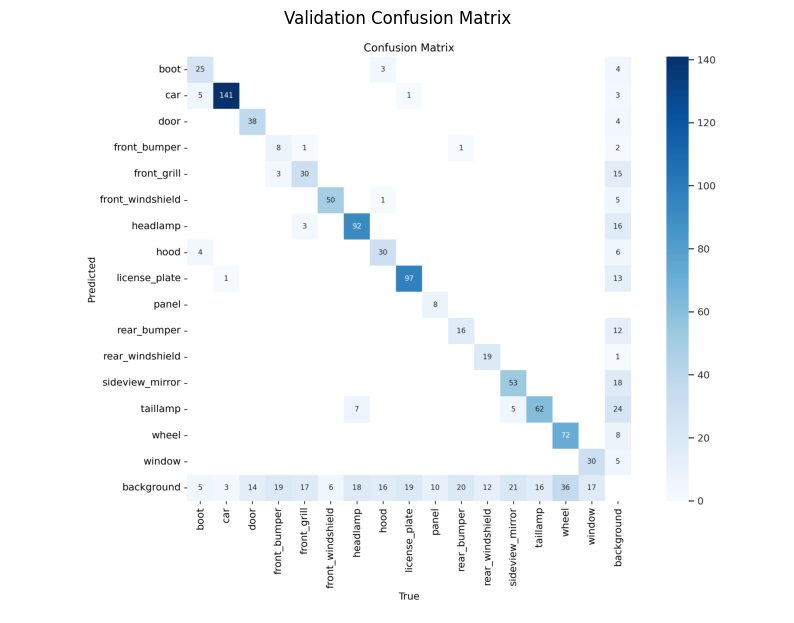

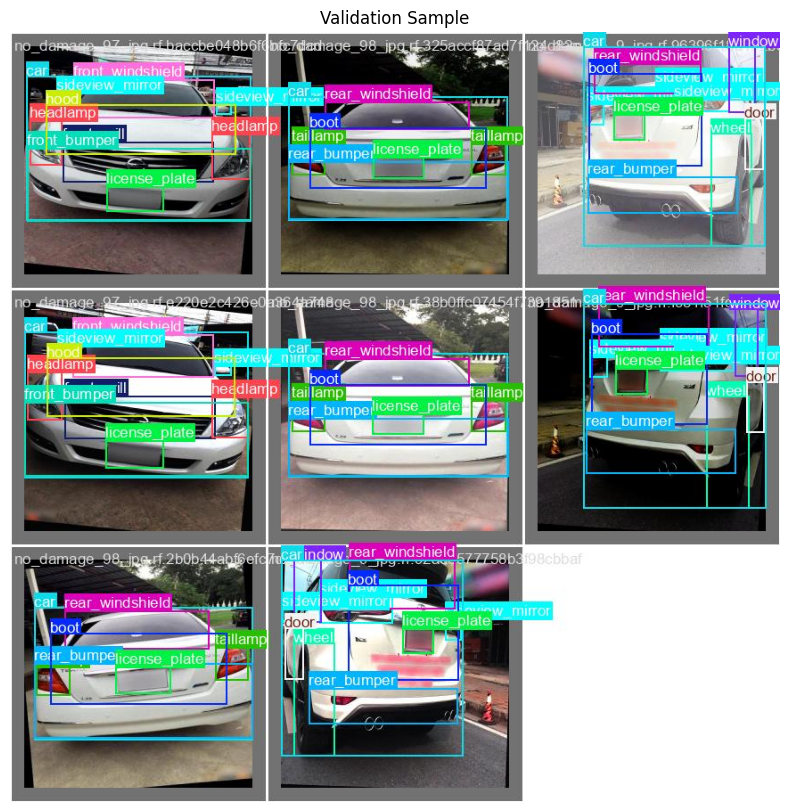

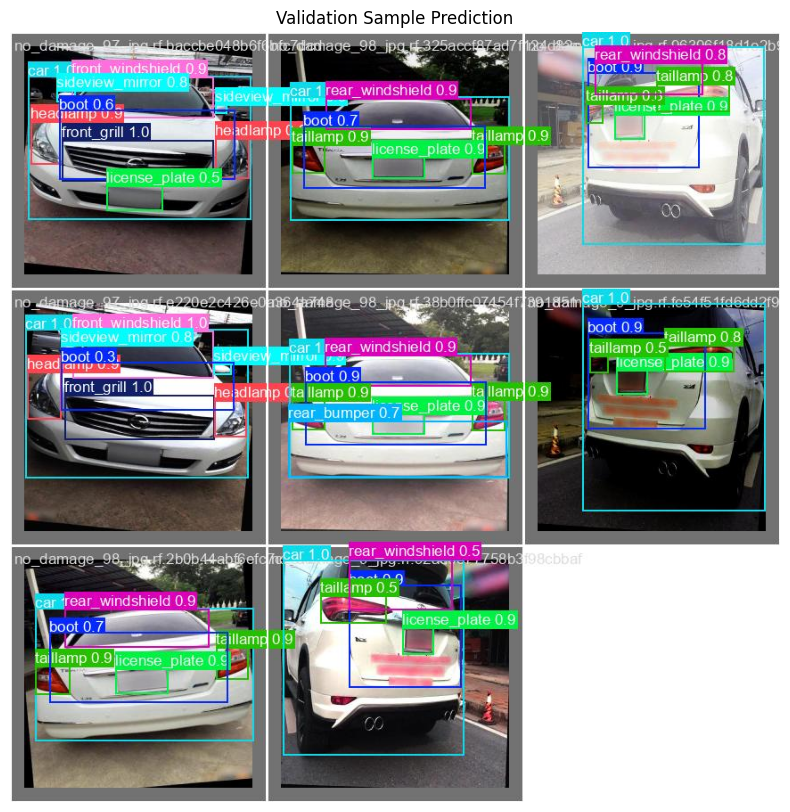

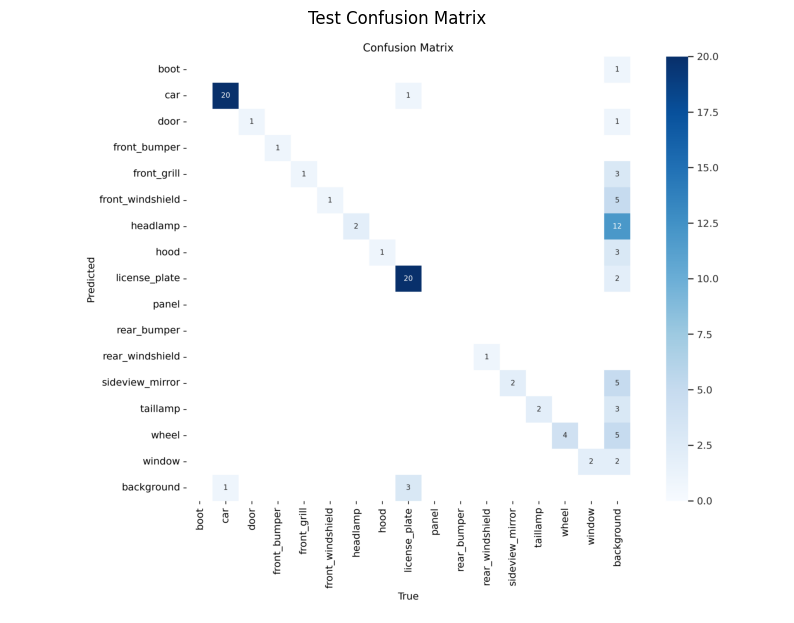

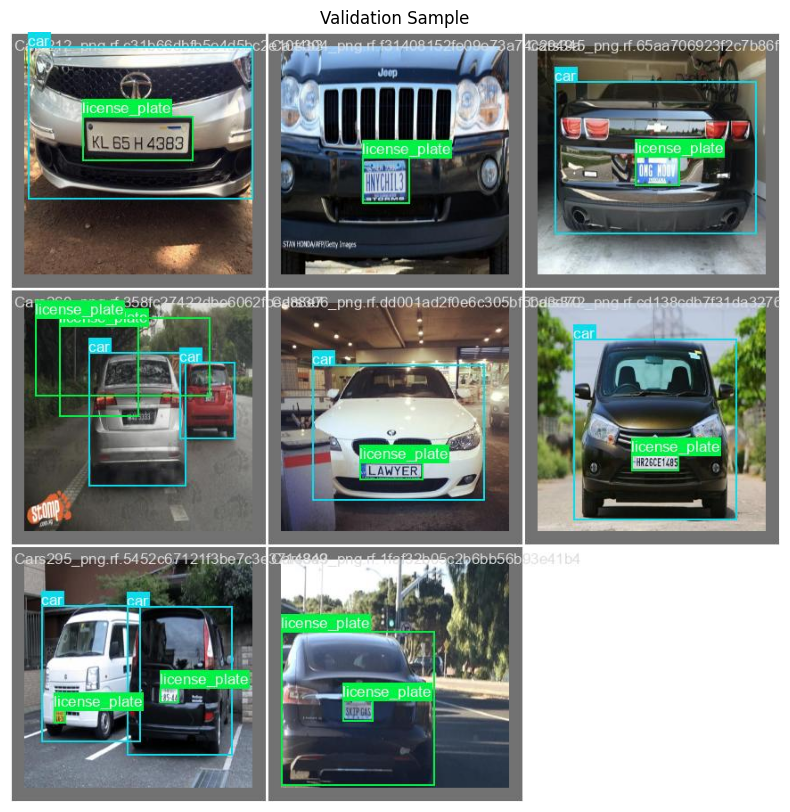

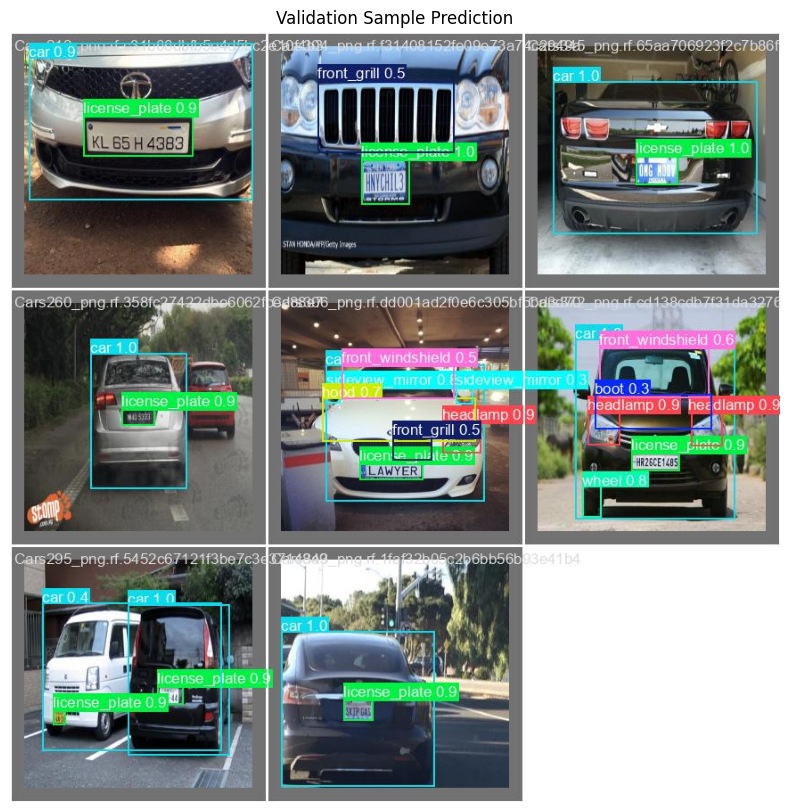

In [16]:
import matplotlib.pyplot as plt
import os
from PIL import Image

def plot_image(image_path, title, save_path=None):
    img = Image.open(image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)
    
    # Save the image if save_path is provided
    if save_path:
        plt.savefig(save_path)
    else:
        plt.show()

# Paths to result directories
val_results_path = 'runs/detect/train2'
test_results_path = 'runs/detect/train3'

# Plot and save images
plot_image(os.path.join(val_results_path, 'confusion_matrix.png'), 'Validation Confusion Matrix', save_path='/kaggle/working/validation_confusion_matrix.png')
plot_image(os.path.join(val_results_path, 'val_batch0_labels.jpg'), 'Validation Sample', save_path='/kaggle/working/validation_sample_labels.jpg')
plot_image(os.path.join(val_results_path, 'val_batch0_pred.jpg'), 'Validation Sample Prediction', save_path='/kaggle/working/validation_sample_prediction.jpg')
plot_image(os.path.join(test_results_path, 'confusion_matrix.png'), 'Test Confusion Matrix', save_path='/kaggle/working/test_confusion_matrix.png')
plot_image(os.path.join(test_results_path, 'val_batch0_labels.jpg'), 'Validation Sample', save_path='/kaggle/working/validation_sample_labels.jpg')
plot_image(os.path.join(test_results_path, 'val_batch0_pred.jpg'), 'Validation Sample Prediction', save_path='/kaggle/working/validation_sample_prediction.jpg')


In [20]:
mkdir /kaggle/working/RESULTS

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


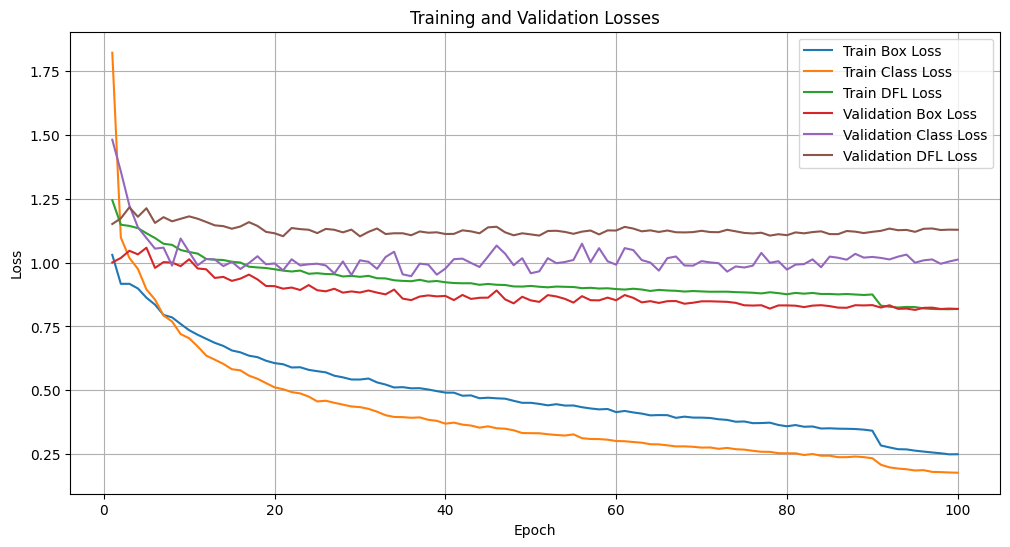

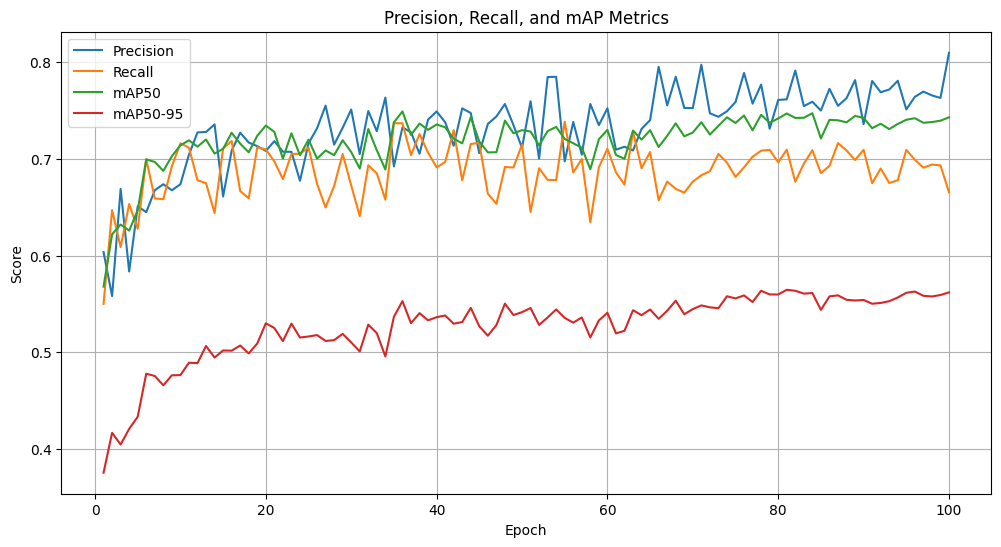

Plots saved at /kaggle/working/RESULTS/losses_plot.png and /kaggle/working/RESULTS/metrics_plot.png


In [21]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Sample data (replace with actual metrics)
epochs = np.arange(1, 101)  # Assuming 50 epochs
train_box_loss = df['         train/box_loss']
train_cls_loss = df['         train/cls_loss']
train_dfl_loss = df['         train/dfl_loss']
val_box_loss = df['           val/box_loss']
val_cls_loss = df['           val/cls_loss']
val_dfl_loss = df['           val/dfl_loss']
precision = df['   metrics/precision(B)']
recall = df['      metrics/recall(B)']
mAP50 = df['       metrics/mAP50(B)']
mAP50_95 = df['    metrics/mAP50-95(B)']

# Plot losses
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_box_loss, label='Train Box Loss')
plt.plot(epochs, train_cls_loss, label='Train Class Loss')
plt.plot(epochs, train_dfl_loss, label='Train DFL Loss')
plt.plot(epochs, val_box_loss, label='Validation Box Loss')
plt.plot(epochs, val_cls_loss, label='Validation Class Loss')
plt.plot(epochs, val_dfl_loss, label='Validation DFL Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Save the plot
save_path_losses = '/kaggle/working/RESULTS/losses_plot.png'
plt.savefig(save_path_losses)
plt.show()

# Plot precision, recall, and mAP metrics
plt.figure(figsize=(12, 6))
plt.plot(epochs, precision, label='Precision')
plt.plot(epochs, recall, label='Recall')
plt.plot(epochs, mAP50, label='mAP50')
plt.plot(epochs, mAP50_95, label='mAP50-95')
plt.title('Precision, Recall, and mAP Metrics')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Save the plot
save_path_metrics = '/kaggle/working/RESULTS/metrics_plot.png'
plt.savefig(save_path_metrics)
plt.show()

print(f"Plots saved at {save_path_losses} and {save_path_metrics}")
